In [1]:
import pandas as pd

In [9]:
#Load USDA database & transform it into the form we need
food_database = pd.read_excel("2019-2020 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", 
                              header = 1 #set column headers
                              )


,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,...,0.040,0.000,0.374,0.052,0.0,0.026,0.000,0.000,0.000,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,...,0.002,0.000,0.074,0.008,0.0,0.003,0.000,0.001,0.000,88.92
2,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0.0,3.20,...,0.004,0.000,0.115,0.013,0.0,0.004,0.001,0.002,0.000,88.10
3,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.90,4.89,0.0,1.90,...,0.002,0.000,0.061,0.007,0.0,0.003,0.000,0.001,0.000,89.10
4,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0.0,0.95,...,0.001,0.000,0.033,0.004,0.0,0.001,0.000,0.000,0.000,89.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,99997802,Tomatoes as ingredient in omelet,9999,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,...,0.000,0.000,0.089,0.004,0.0,0.000,0.000,0.000,0.000,92.57
5620,99997804,Other vegetables as ingredient in omelet,9999,Not included in a food category,39,3.25,5.74,2.73,1.4,0.39,...,0.000,0.000,0.174,0.001,0.0,0.000,0.000,0.000,0.000,89.67
5621,99997810,Vegetables as ingredient in curry,9999,Not included in a food category,52,1.81,11.60,3.25,2.2,0.19,...,0.000,0.000,0.052,0.012,0.0,0.000,0.000,0.000,0.000,85.59
5622,99998130,Sauce as ingredient in hamburgers,9999,Not included in a food category,272,1.34,17.14,13.08,0.6,22.85,...,0.106,0.133,11.810,1.682,0.0,0.015,0.000,0.000,0.002,55.97


Current thought:
- amount of foods are inputs
- quality rates are weights (e.g., amount of calories per 100gs)

In [37]:
#very basic prototype optimization algorithm

import numpy as np
import matplotlib.pyplot as plt

#intialzie amounts
amounts = np.array([[1.0,1.0]])

#rows represent food, cols represent qualities
quality_rates = np.array([[1,2,.5],
                          [1,2,2]])

learning_rate = .001

#goal amounts
targets = [5,10,8]

outputs, errors, amountss = [], [], []

stop_time = 1000
for i in range(stop_time):
    output = np.dot(amounts, quality_rates)
    outputs.append(output)
    #squared error is the loss function
    error = (output - targets)**2
    errors.append(error)
    #derivative of loss wrt to output
    dloss = 2*(output - targets)
    #print(dloss)

    dmax = targets.copy
    dmax = np.ones_like(output)
    dmax[output >= targets] = 0 
    #print(dmax)

    dfoods = dloss * dmax
    #print(dfoods)

    #deriv wrt amounts is quality rate
    dinputs = np.dot(dfoods, quality_rates.T)
    #print(dinputs)

    amounts += -learning_rate * dinputs
    amountss.append(amounts)


print(amounts)
print(output)
print(error)

[[2.27147371 3.43186411]]
[[ 5.70333513 11.40667026  7.9994605 ]]
[[4.94680305e-01 1.97872122e+00 2.91059849e-07]]


How to fully implement for food
- we are going to minimize cost, while trying to meet thresholds for other items

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


food_data = pd.read_excel(r"C:\Users\Chris\Desktop\Diet Data\Diet Optimization.xlsx", sheet_name="For Python Test")

In [426]:
quality_rates = food_data.iloc[0:20,6:].to_numpy()

In [427]:
target_values = food_data.iloc[24:,2].to_numpy().astype(float).reshape(1,-1)
target_values

array([[0.000e+00, 2.035e+03, 1.530e+02, 5.000e+01, 2.000e+02, 3.000e+01,
        1.000e+03, 4.000e+02, 9.000e+02, 2.400e+00, 1.300e+00, 9.000e+01,
        1.500e+01, 1.500e+01, 1.200e+02, 9.000e-01, 8.000e+00, 4.000e+02,
        1.100e+01, 7.000e+02, 5.500e+01, 3.400e+03, 1.500e+03, 5.500e+02,
        1.200e+00, 1.300e+00, 1.600e+01, 1.600e+00]])

In [428]:
food_limits = food_data.iloc[24:44,6].to_numpy().reshape(1,-1)
food_limits

array([[3.  , 0.3 , 0.3 , 5.  , 1.5 , 1.  , 0.5 , 1.5 , 0.25, 0.5 , 0.5 ,
        0.5 , 0.5 , 0.1 , 1.4 , 1.  , 2.1 , 0.1 , 2.3 , 0.21]])

In [446]:
food_req = food_data.iloc[24:44,9].to_numpy().reshape(1,-1)
food_req

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 2.25, 0.2 ]])

[[14.16134781581537 2037.2785817256718 185.40416141509465
  61.61259404604159 191.38917750345323 35.52947153624549 996.275533812199
  408.88739969527376 1273.7967707828657 5.851093697205122
  4.677165013758189 259.6339935109685 9.963689467153714
  15.220798971563193 690.6535047871552 1.7094162737621375
  13.163918681377243 649.899890557367 14.070238702236018
  2567.6617755249986 248.54940382997793 4406.777944427061
  3219.3312605949004 544.8470952134619 1.6651903514489501
  3.1821914853142506 52.80138466855446 2.5279426119281556]]
[[14.16134781581537 2.2785817256717564 32.40416141509465
  11.612594046041593 -8.610822496546774 5.529471536245488
  -3.7244661878009993 8.887399695273757 373.7967707828657
  3.451093697205122 3.377165013758189 169.63399351096848
  -5.0363105328462865 0.22079897156319284 570.6535047871552
  0.8094162737621374 5.163918681377243 249.89989055736703
  3.0702387022360185 1867.6617755249986 193.54940382997793
  1006.7779444270609 1719.3312605949004 -5.1529047865381

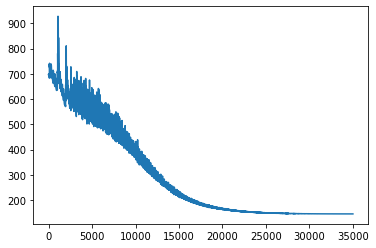

In [1031]:
#amounts = np.random.rand(1,20) * 10
amounts = np.zeros((1,20))
#amounts[0,0] = 14
learning_rate = .001
#starting_learning_rate = .01
learning_rate_decay = 0.00000001#0.0000001
errors = []

dinputs_momentums = np.zeros_like(amounts)
cache = np.zeros_like(amounts)
epsilon = 1e-7 

beta_1 = .9
beta_2 = .999

lambda_penalty = 30

for i in range(40000):

    outputs = np.dot(amounts, quality_rates)
    error = (outputs - target_values)**2
    error[0,0] = 0
    error[0,2:][outputs[0,2:] >= target_values[0,2:]] = 0.0
    errors.append(np.sum(error))

    penalty_deriv = np.zeros_like(amounts)
    penalty_deriv[amounts.copy() > food_limits.copy()] = 1
    penalty_deriv[amounts.copy() < food_req.copy()] = -1
    penalty_deriv = penalty_deriv * food_limits.copy()

    dloss = 2*(outputs - target_values)
    dmax = np.ones_like(outputs)

    #we are looking to stay calorie target, and minimize costs, so want to avoid those
    #but once all the other ones have hit their goals, set them to 0
    #dmax[0,1] = 0 if outputs[0,1] <= target_values[0,1] else dmax[0,1]
    #dmax[0,0] = 0
    dmax[0,2:][outputs[0,2:] >= target_values[0,2:]] = 0.0
    
    dfoods = dloss * dmax
    dinputs = np.dot(dfoods, quality_rates.T)

    #momentum
    dinputs_momentums = dinputs_momentums * beta_1 + dinputs.astype(float) * (1 - beta_1)
    correted_momentums = dinputs_momentums / (1 - beta_1 ** (i + 1))

    cache = cache * beta_2 + (1-beta_2) * dinputs.astype(float) ** 2
    corrected_cahce = cache / (1 - beta_2 ** (i + 1))
    
    amounts += -learning_rate * (correted_momentums / (np.sqrt(cache) + epsilon)  + lambda_penalty * penalty_deriv)

    learning_rate = learning_rate * (1 / (1 + learning_rate_decay * i))

results = np.dot(amounts, quality_rates)
print(results)
print(results - target_values)
print("final error:", errors[-1])
plt.plot(errors[5000:])
plt.show()

In [1029]:
penalty_deriv = np.zeros_like(amounts)
penalty_deriv[amounts.copy() > food_limits.copy()] = 1
penalty_deriv[amounts.copy() < food_req.copy()] = -1
penalty_deriv = penalty_deriv * food_limits.copy()
penalty_deriv

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. , -0.1,  0. ,  0. ,  0. , -0.1,  0. ,  0. ]])

In [1024]:
amounts

array([[2.9928212 , 0.29959654, 0.24990221, 2.58243716, 1.49514628,
        0.99946504, 0.49949227, 1.49565694, 0.24942013, 0.49840345,
        0.49515894, 0.49976592, 0.49988733, 0.09911362, 0.53882604,
        0.99321769, 2.08349763, 0.09948782, 2.27297753, 0.20631469]])

In [53]:
print(len(dmax[0,2:][outputs[0,2:] >= target_values[0,2:]]))
print(len(dmax[0,2:]))

20
26


In [370]:
amounts

array([[0.80098683, 0.960138  , 0.3339574 , 0.79223694, 0.98035332,
        0.9620566 , 0.85581206, 0.30311747, 0.49074651, 0.84937053,
        0.59937872, 0.83357629, 0.8366681 , 0.32156676, 0.83438745,
        0.98378834, 0.66791815, 0.53281083, 0.61081585, 0.37045959]])

Notes from this go around:
- have been successful in closely matching excel output
- requires averaging gradients (dividing dloss by sum of dmax)
- without cost constraint we get very close to solver results
- with cost constaint it is close, but a bit more different
- ideal learning rate  learning_rate = .00001

Possible Improvements
- RMS prop?/ADA grad?? - i think the key will be some type of per-parameter learning rate, as the parameters have very differnet sizes, thus a global rate does not work well. For example, applying the same learning rate to calories and omega3s doesn't work because calories has much higher magnitude values than omega3
- momentum
- adaptive gradient
- learning rate decay

Features that I don't think are very helpful (pre-adagrad/RMS prop):
- gradient normalization - does not seem to make a huge difference. I think this is not very beneficial because there is nothing really to smooth out. We are stochastically descending the gradient and don't have batches. 
- learning rate decay - does not seem to help. The varying magnitude of parameters remove the effectiveness of learning rate decay because we are using a uniform decay rate. Thus suffers from same issue as uniform learning rate
- momentum

After adding adagrad & rmsprop
- we get to a local minimum quite quickly, which is close to excel solver solution => and if parameters are set accordinly, can get very similar solutions between RMSprop and ada grad
- ada grad does best with learning rate of 1, RMS .001. Same lrd
- perhaps try adam next. But I am starting to think this is probably the most optimal solution we will get

Further Updates:
- have added Adam, it works ok, I think a little better than plain RMS prop/ada
- instead of resetting amounts each time, I am now trying to do constrained optimization
- it does not work very well right now. Possible improvements/Considerations:
1) Don't think it should be included within the cache or momentum EWMAs
2) The penalty term, lambda, should be scaled somehow, because we are dealing with values of different magnitudes


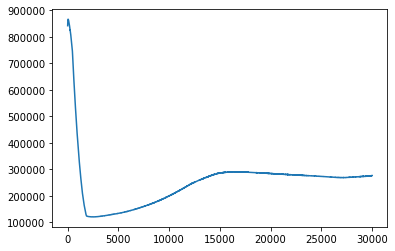